In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../kaggle/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


    

../kaggle/features.csv
../kaggle/responders.csv
../kaggle/sample_submission.csv
../kaggle/kaggle_evaluation\jane_street_gateway.py
../kaggle/kaggle_evaluation\jane_street_inference_server.py
../kaggle/kaggle_evaluation\__init__.py
../kaggle/kaggle_evaluation\core\base_gateway.py
../kaggle/kaggle_evaluation\core\kaggle_evaluation.proto
../kaggle/kaggle_evaluation\core\relay.py
../kaggle/kaggle_evaluation\core\templates.py
../kaggle/kaggle_evaluation\core\__init__.py
../kaggle/kaggle_evaluation\core\generated\kaggle_evaluation_pb2.py
../kaggle/kaggle_evaluation\core\generated\kaggle_evaluation_pb2_grpc.py
../kaggle/kaggle_evaluation\core\generated\__init__.py
../kaggle/lags.parquet\date_id=0\part-0.parquet
../kaggle/test.parquet\date_id=0\part-0.parquet
../kaggle/train.parquet\partition_id=0\part-0.parquet
../kaggle/train.parquet\partition_id=1\part-0.parquet
../kaggle/train.parquet\partition_id=2\part-0.parquet
../kaggle/train.parquet\partition_id=3\part-0.parquet
../kaggle/train.parque

In [21]:
#view kaggle/train.parquet\partition_id=0\part-0.parquet
import polars as pl
view = pl.read_parquet('../kaggle/train.parquet/partition_id=0/part-0.parquet')
print(view)


shape: (1_944_210, 92)
┌─────────┬─────────┬───────────┬──────────┬───┬────────────┬────────────┬────────────┬────────────┐
│ date_id ┆ time_id ┆ symbol_id ┆ weight   ┆ … ┆ responder_ ┆ responder_ ┆ responder_ ┆ responder_ │
│ ---     ┆ ---     ┆ ---       ┆ ---      ┆   ┆ 5          ┆ 6          ┆ 7          ┆ 8          │
│ i16     ┆ i16     ┆ i8        ┆ f32      ┆   ┆ ---        ┆ ---        ┆ ---        ┆ ---        │
│         ┆         ┆           ┆          ┆   ┆ f32        ┆ f32        ┆ f32        ┆ f32        │
╞═════════╪═════════╪═══════════╪══════════╪═══╪════════════╪════════════╪════════════╪════════════╡
│ 0       ┆ 0       ┆ 1         ┆ 3.889038 ┆ … ┆ 1.218368   ┆ 0.775981   ┆ 0.346999   ┆ 0.095504   │
│ 0       ┆ 0       ┆ 7         ┆ 1.370613 ┆ … ┆ 5.0        ┆ 0.703665   ┆ 0.216683   ┆ 0.778639   │
│ 0       ┆ 0       ┆ 9         ┆ 2.285698 ┆ … ┆ 0.099793   ┆ 2.109352   ┆ 0.670881   ┆ 0.772828   │
│ 0       ┆ 0       ┆ 10        ┆ 0.690606 ┆ … ┆ 1.225376   ┆ 1.1141

In [25]:
features = pd.read_csv('../kaggle/features.csv')
features

,feature,tag_0,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9,tag_10,tag_11,tag_12,tag_13,tag_14,tag_15,tag_16
0,feature_00,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True
1,feature_01,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,True
2,feature_02,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True
3,feature_03,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
4,feature_04,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,feature_74,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
75,feature_75,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
76,feature_76,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
77,feature_77,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False


In [27]:
import pandas as pd
import numpy as np
import polars as pl
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator, FormatStrFormatter, PercentFormatter
import seaborn as sns

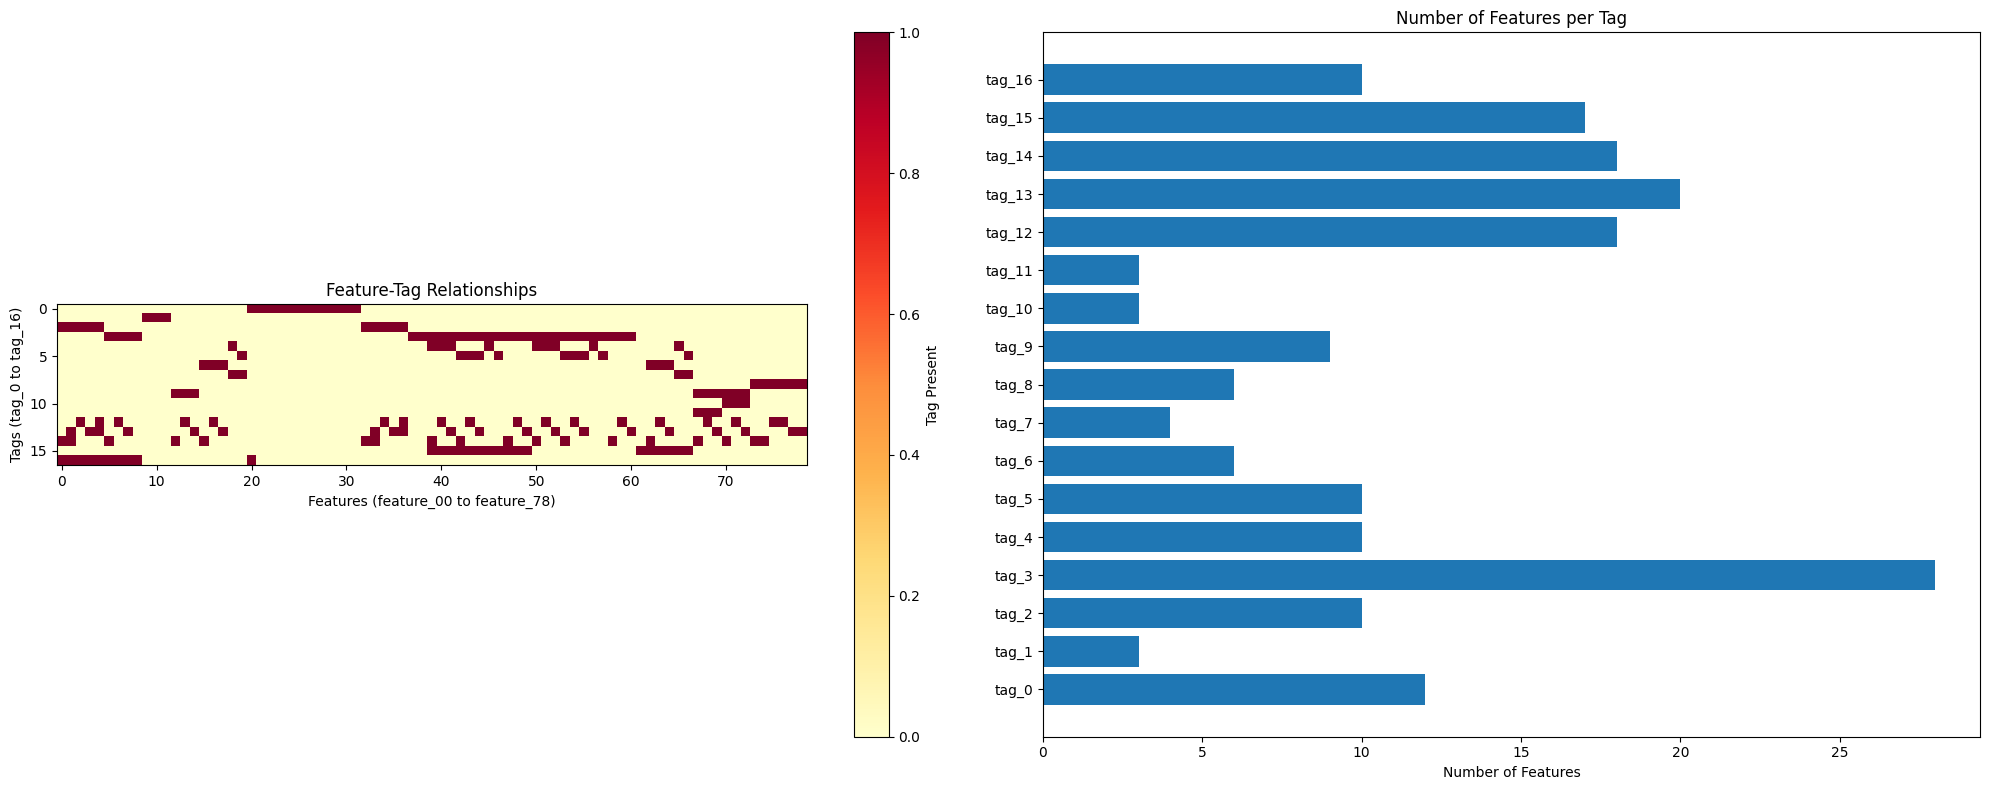


=== Tag Analysis ===
tag_0: 12 features (15.2%)
tag_1: 3 features (3.8%)
tag_2: 10 features (12.7%)
tag_3: 28 features (35.4%)
tag_4: 10 features (12.7%)
tag_5: 10 features (12.7%)
tag_6: 6 features (7.6%)
tag_7: 4 features (5.1%)
tag_8: 6 features (7.6%)
tag_9: 9 features (11.4%)
tag_10: 3 features (3.8%)
tag_11: 3 features (3.8%)
tag_12: 18 features (22.8%)
tag_13: 20 features (25.3%)
tag_14: 18 features (22.8%)
tag_15: 17 features (21.5%)
tag_16: 10 features (12.7%)

=== Features with Identical Tag Patterns ===
feature_09 and feature_10 have identical tags
feature_09 and feature_11 have identical tags
feature_10 and feature_11 have identical tags
feature_21 and feature_22 have identical tags
feature_21 and feature_23 have identical tags
feature_21 and feature_24 have identical tags
feature_21 and feature_25 have identical tags
feature_21 and feature_26 have identical tags
feature_21 and feature_27 have identical tags
feature_21 and feature_28 have identical tags
feature_21 and feat

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load and prepare the features data
features = pd.read_csv('../kaggle/features.csv')

# Create two visualizations side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# 1. Feature-Tag Matrix Visualization
im = ax1.imshow(features.iloc[:, 1:].T.values, cmap="YlOrRd")
ax1.set_xlabel("Features (feature_00 to feature_78)")
ax1.set_ylabel("Tags (tag_0 to tag_16)")
ax1.set_title("Feature-Tag Relationships")

# Add colorbar
plt.colorbar(im, ax=ax1, label="Tag Present")

# 2. Tag Distribution Analysis
tag_counts = features.iloc[:, 1:].sum()
ax2.barh(np.arange(len(tag_counts)), tag_counts)
ax2.set_yticks(np.arange(len(tag_counts)))
ax2.set_yticklabels(tag_counts.index)
ax2.set_xlabel("Number of Features")
ax2.set_title("Number of Features per Tag")

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n=== Tag Analysis ===")
for tag in features.columns[1:]:
    n_features = features[tag].sum()
    print(f"{tag}: {n_features} features ({n_features/len(features)*100:.1f}%)")

# Find features with similar tag patterns
def get_similar_features(features_df):
    similar_features = []
    for i in range(len(features_df)):
        for j in range(i+1, len(features_df)):
            pattern_i = features_df.iloc[i, 1:]
            pattern_j = features_df.iloc[j, 1:]
            if (pattern_i == pattern_j).all():
                similar_features.append((
                    features_df.iloc[i, 0],
                    features_df.iloc[j, 0]
                ))
    return similar_features

similar_features = get_similar_features(features)
if similar_features:
    print("\n=== Features with Identical Tag Patterns ===")
    for f1, f2 in similar_features:
        print(f"{f1} and {f2} have identical tags")

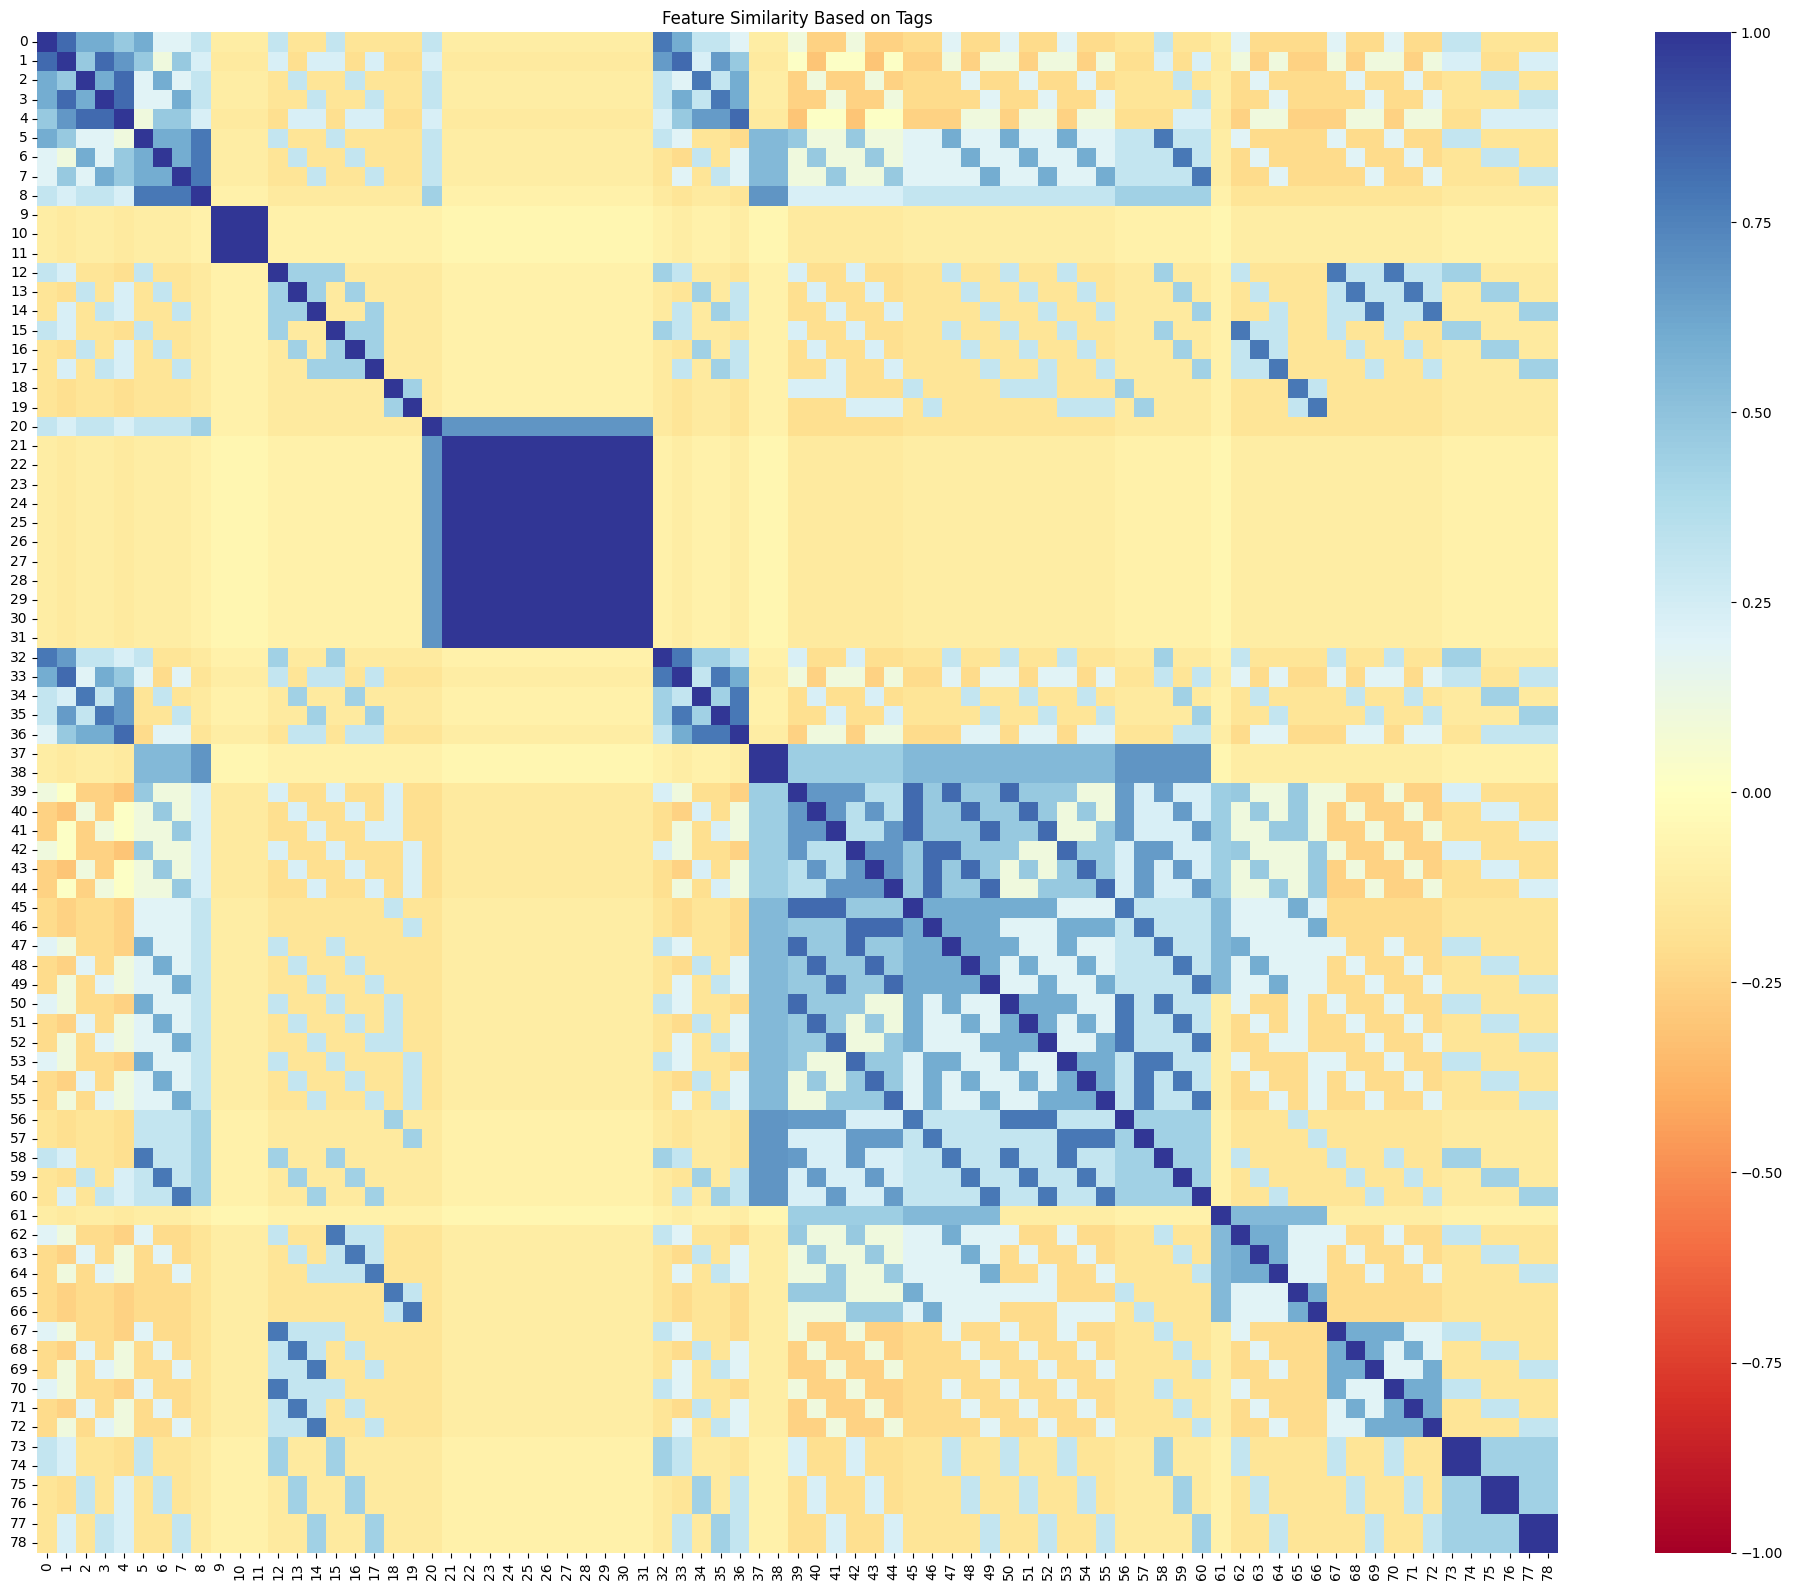


=== Most Similar Feature Pairs (Based on Tags) ===

Top 10 Most Similar Feature Pairs:
      feature1  feature2  similarity
666          9        10         1.0
667          9        11         1.0
735         10        11         1.0
1428        21        22         1.0
1429        21        23         1.0
1430        21        24         1.0
1431        21        25         1.0
1432        21        26         1.0
1433        21        27         1.0
1434        21        28         1.0

=== Number of Tags per Feature ===
Average number of tags per feature: 2.367088607594937
Max number of tags for any feature: 4
Min number of tags for any feature: 1


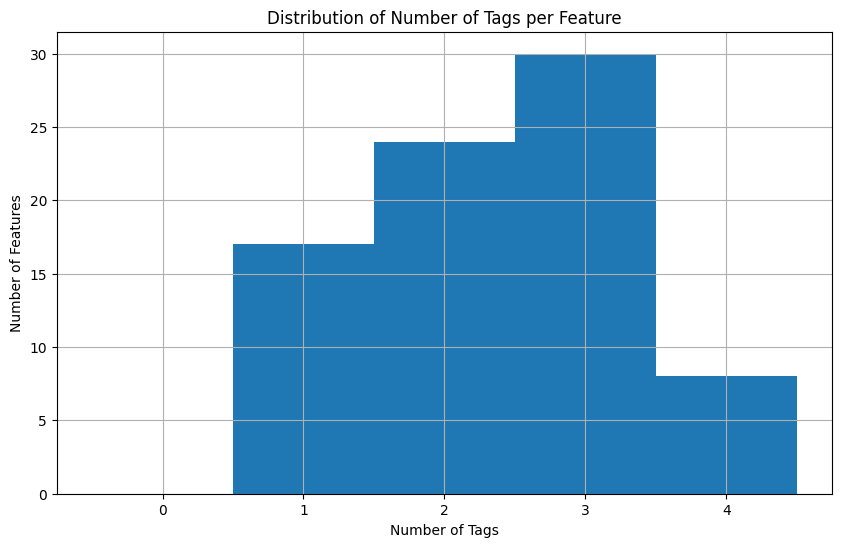

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load features metadata
features = pd.read_csv('../kaggle/features.csv')

# Create correlation matrix based on tag patterns
feature_matrix = features.iloc[:, 1:]  # Exclude the 'feature' column to get just the tags
corr_matrix = feature_matrix.T.corr()  # Transpose to get correlations between features based on their tags

# Create the heatmap
plt.figure(figsize=(20, 16))
heatmap = sns.heatmap(corr_matrix, 
                      cmap='RdYlBu',
                      vmin=-1, 
                      vmax=1,
                      center=0,
                      square=True)
plt.title('Feature Similarity Based on Tags')

# Rotate labels for better readability
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Find groups of highly similar features based on tags
print("\n=== Most Similar Feature Pairs (Based on Tags) ===")
similarities = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        similarities.append({
            'feature1': corr_matrix.columns[i],
            'feature2': corr_matrix.columns[j],
            'similarity': corr_matrix.iloc[i, j]
        })

similarities_df = pd.DataFrame(similarities)
print("\nTop 10 Most Similar Feature Pairs:")
print(similarities_df.nlargest(10, 'similarity'))

# Count how many tags each feature has
tag_counts = feature_matrix.sum(axis=1)
print("\n=== Number of Tags per Feature ===")
print("Average number of tags per feature:", tag_counts.mean())
print("Max number of tags for any feature:", tag_counts.max())
print("Min number of tags for any feature:", tag_counts.min())

# Show distribution of tag counts
plt.figure(figsize=(10, 6))
plt.hist(tag_counts, bins=range(int(tag_counts.max())+2), align='left')
plt.title('Distribution of Number of Tags per Feature')
plt.xlabel('Number of Tags')
plt.ylabel('Number of Features')
plt.grid(True)
plt.show()

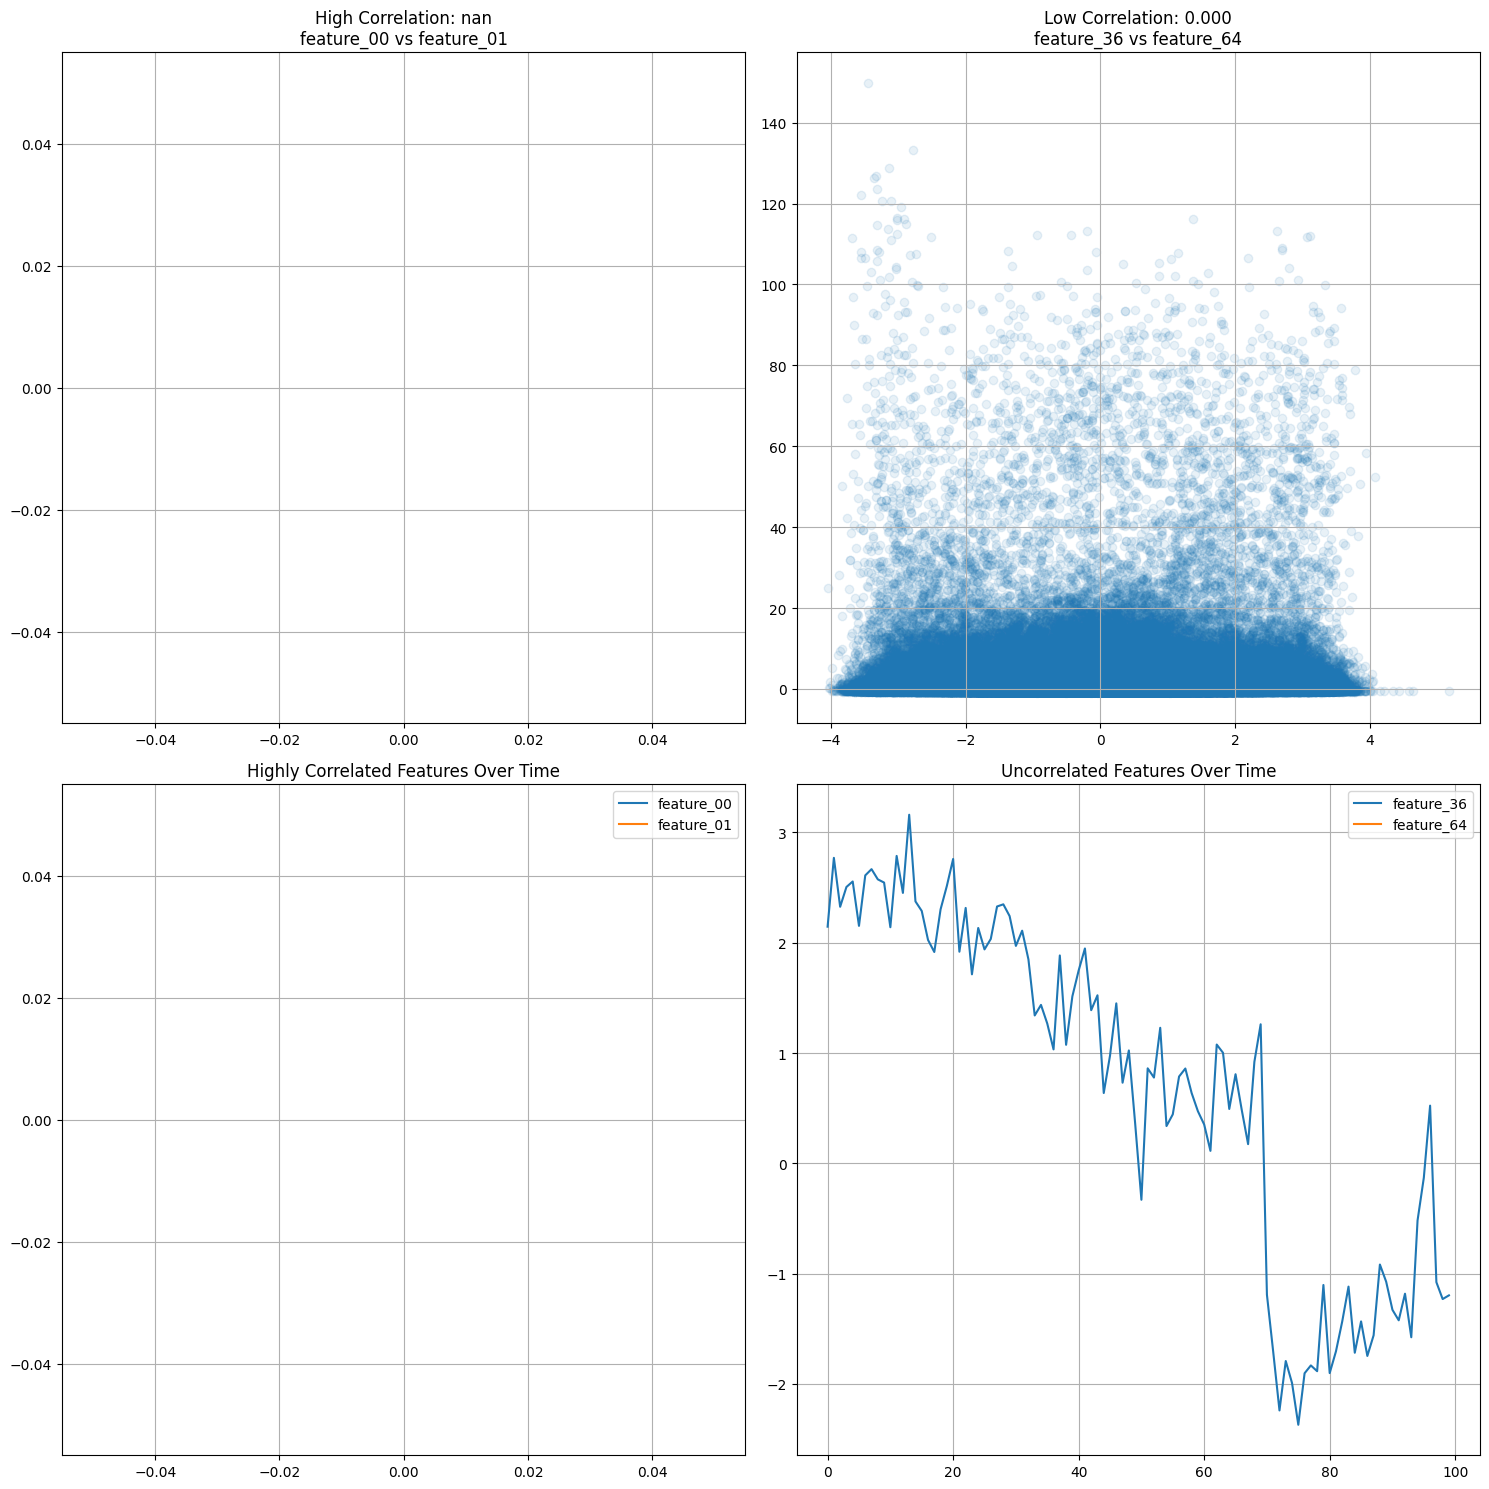


Highly Correlated Feature Pairs:
feature_00 and feature_01: nan
feature_00 and feature_02: nan
feature_00 and feature_03: nan

Uncorrelated Feature Pairs:
feature_36 and feature_64: 0.000
feature_48 and feature_73: 0.000
feature_59 and feature_64: 0.000


In [39]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
train = pl.read_parquet('../kaggle/train.parquet/partition_id=0/part-0.parquet')

# Let's find some highly correlated and uncorrelated features
def find_feature_pairs(train_df, n_pairs=3):
    feature_cols = [col for col in train_df.columns if col.startswith('feature_')]
    
    # Calculate correlations between all features
    corr_pairs = []
    for i in range(len(feature_cols)):
        for j in range(i+1, len(feature_cols)):
            corr = train_df.select([
                pl.corr(feature_cols[i], feature_cols[j]).alias('correlation')
            ]).get_column('correlation')[0]
            corr_pairs.append((feature_cols[i], feature_cols[j], abs(corr)))
    
    # Sort by absolute correlation
    corr_pairs.sort(key=lambda x: x[2], reverse=True)
    
    # Get most and least correlated pairs
    high_corr = corr_pairs[:n_pairs]
    low_corr = corr_pairs[-n_pairs:]
    
    return high_corr, low_corr

high_corr_pairs, low_corr_pairs = find_feature_pairs(train)

# Plot examples of high and low correlation
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))

# High correlation example
f1, f2, corr = high_corr_pairs[0]
ax1.scatter(train[f1], train[f2], alpha=0.1)
ax1.set_title(f'High Correlation: {corr:.3f}\n{f1} vs {f2}')
ax1.grid(True)

# Low correlation example
f1, f2, corr = low_corr_pairs[0]
ax2.scatter(train[f1], train[f2], alpha=0.1)
ax2.set_title(f'Low Correlation: {corr:.3f}\n{f1} vs {f2}')
ax2.grid(True)

# Plot how they move over time
sample_rows = train.filter(pl.col('symbol_id') == 0).head(100)

# High correlation pair
f1, f2, corr = high_corr_pairs[0]
ax3.plot(sample_rows[f1], label=f1)
ax3.plot(sample_rows[f2], label=f2)
ax3.set_title('Highly Correlated Features Over Time')
ax3.legend()
ax3.grid(True)

# Low correlation pair
f1, f2, corr = low_corr_pairs[0]
ax4.plot(sample_rows[f1], label=f1)
ax4.plot(sample_rows[f2], label=f2)
ax4.set_title('Uncorrelated Features Over Time')
ax4.legend()
ax4.grid(True)

plt.tight_layout()
plt.show()

# Print some statistics
print("\nHighly Correlated Feature Pairs:")
for f1, f2, corr in high_corr_pairs:
    print(f"{f1} and {f2}: {corr:.3f}")

print("\nUncorrelated Feature Pairs:")
for f1, f2, corr in low_corr_pairs:
    print(f"{f1} and {f2}: {corr:.3f}")